Now we compute the same Ramsey model using time iteration. Recall that the Bellman equation is
$$
V\left(k,z\right)=\max_{k^{\prime}}v\left(f\left(k,z\right)-k^{\prime}\right)+\beta\mathbb{E}_{z^{\prime}}V\left(k^{\prime},z^{\prime}\right)
$$
The first order condition with respect to $k^\prime$ is:
$$
\frac{1}{f\left(k,z\right)-k^{\prime}}=\beta\mathbb{E}_{z^{\prime}}V_{k}\left(k^{\prime},z^{\prime}\right)
$$
The envelope theorem implies that
$$
V_{k}\left(k,z\right)=\frac{f_{k}\left(k,z\right)}{f\left(k,z\right)-k^{\prime}}
$$
Therefore the Euler equation is
$$
\frac{1}{f\left(k,z\right)-k^{\prime}}=\beta\mathbb{E}_{z^{\prime}}\frac{f_{k}\left(k^{\prime},z^{\prime}\right)}{f\left(k^{\prime},z^{\prime}\right)-k^{\prime \prime}}
$$
where
$$
f_{k}\left(k^{\prime},1\right)=0.27k^{-0.7}+0.3
$$
$$
f_{k}\left(k^{\prime},2\right)=0.33k^{-0.7}+0.9
$$

(1) Approximate the investment policy (as a function of capital and the shock) by a piecewise linear function, take 30 pieces (for each value of the shock).

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

In [2]:
# production function
def f(k,z):
    if z == 1:
        y = 0.9*k**0.3 + 0.3*k
    elif z == 2:
        y = 1.1*k**0.3 + 0.9*k
    return y

# derivative of production function
def fk(k,z):
    if z == 1:
        fk = 0.27*k**(-0.7) + 0.3
    elif z == 2:
        fk = 0.33*k**(-0.7) + 0.9
    return fk

# residual function
def res(x,k,z,kgrid,gk,beta):
    eelhs = 1 / (f(k,z)-x)
    inter1 = interp1d(kgrid, gk[:,0])
    inter2 = interp1d(kgrid, gk[:,1])
    eerhs = beta * 0.5 * (fk(x,1)/(f(x,1)-inter1(x)) + fk(x,2)/(f(x,2)-inter2(x)))
    return eelhs - eerhs

In [3]:
# capital collocation points
nk = 30 
kmin = 0.1
kmax = 1.5
kgrid = np.linspace(kmin, kmax, nk)

# iteration pre-allocation
tol = 1e-6
gkguess = np.zeros((nk,2))
gkupdate = np.zeros((nk,2))
residual = np.zeros((nk,2))
diff = 1

# parameter
beta = 0.9

In [4]:
# iteration
while diff > tol:
    
    for ik in range(nk):
        for iz in range(2):
            k = kgrid[ik]
            z = iz + 1
            gkupdate[ik,iz] = fsolve(res,0.1,args=(k,z,kgrid,gkguess,beta))
            
    for ik in range(nk):
        for iz in range(2):
            k = kgrid[ik]
            z = iz + 1
            residual[ik,iz] = res(gkupdate[ik,iz],k,z,kgrid,gkupdate,beta)
            
    diff = abs(residual).max()
    gkguess = np.copy(gkupdate)

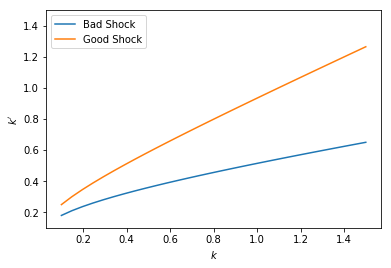

In [5]:
# plot policy
plt.plot(kgrid,gkupdate[:,0],label='Bad Shock')
plt.plot(kgrid,gkupdate[:,1],label='Good Shock')
plt.ylim([min(kgrid),max(kgrid)])
plt.xlabel(r"$k$")
plt.ylabel(r"$k'$")
plt.legend()
plt.show()

(2) Redo the same exercise with $ \beta = 0.999 $ and with $ v(c) = −c^{−4} $. 

Now the Euler equation changes to
$$
\left(f\left(k,z\right)-k^{\prime}\right)^{-5}=\beta\mathbb{E}_{z^{\prime}}\left(f\left(k^{\prime},z^{\prime}\right)-k^{\prime\prime}\right)^{-5}f_{k}\left(k^{\prime},z^{\prime}\right)
$$

In [6]:
# residual function
def res2(x,k,z,kgrid,gk,beta):
    eelhs = (f(k,z)-x)**(-5)
    inter1 = interp1d(kgrid, gk[:,0])
    inter2 = interp1d(kgrid, gk[:,1])
    eerhs = beta * 0.5 * (fk(x,1)*(f(x,1)-inter1(x))**(-5) + fk(x,2)*(f(x,2)-inter2(x))**(-5))
    return eelhs - eerhs

In [7]:
beta = 0.999

# iteration
while diff > tol:
    
    for ik in range(nk):
        for iz in range(2):
            k = kgrid[ik]
            z = iz + 1
            gkupdate[ik,iz] = fsolve(res2,0.1,args=(k,z,kgrid,gkguess,beta))
            
    for ik in range(nk):
        for iz in range(2):
            k = kgrid[ik]
            z = iz + 1
            residual[ik,iz] = res2(gkupdate[ik,iz],k,z,kgrid,gkupdate,beta)
            
    diff = abs(residual).max()
    gkguess = np.copy(gkupdate)

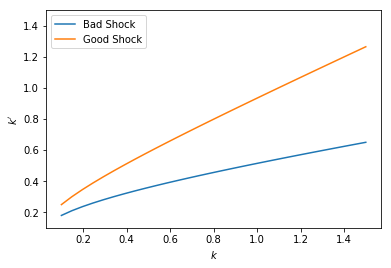

In [8]:
# plot policy
plt.plot(kgrid,gkupdate[:,0],label='Bad Shock')
plt.plot(kgrid,gkupdate[:,1],label='Good Shock')
plt.ylim([min(kgrid),max(kgrid)])
plt.xlabel(r"$k$")
plt.ylabel(r"$k'$")
plt.legend()
plt.show()